# Sequential Forward/Backward Selection with mlxtend

In [4]:
import pandas as pd
import numpy as np

# 模擬數據
data = {
    'Age': np.random.randint(40, 90, size=5),
    'BMI': np.random.uniform(20, 25, size=5),
    'Glucose': np.random.randint(70, 100, size=5),
    'Insulin': np.random.uniform(5, 15, size=5),
    'HOMA': np.random.uniform(0.5, 2.0, size=5),
    'Leptin': np.random.uniform(7, 15, size=5),
    'Adiponectin': np.random.uniform(5, 12, size=5),
    'Resistin': np.random.uniform(7, 13, size=5),
    'MCP.1': np.random.uniform(400, 950, size=5),
    'Classification': np.random.choice([0, 1], size=5)
}

# 建立 DataFrame
df = pd.DataFrame(data)

# 查看生成的 DataFrame
print(df)

   Age        BMI  Glucose    Insulin      HOMA     Leptin  Adiponectin  \
0   43  24.444282       91  14.087222  0.666687   9.378842     5.030617   
1   49  23.358797       90   8.784640  0.998739  10.689659    11.975069   
2   82  22.326738       74   5.973276  1.624408  13.714007     6.693105   
3   75  21.214203       81   7.389841  1.366974   8.446471     9.643602   
4   81  22.592707       82  12.190339  1.889637  14.339156     6.951310   

    Resistin       MCP.1  Classification  
0  11.863476  737.019900               0  
1   7.471944  709.088020               1  
2   8.378782  753.230701               0  
3   9.662730  402.829974               0  
4   9.355237  859.174360               1  


In [6]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from mlxtend.feature_selection import SequentialFeatureSelector as SFS

# Load the data
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Sequential forward selection
sfs = SFS(lr,
           k_features=3, # number of features to select
           forward=True,  # Forward/Backward Selection
           floating=False,
           scoring='accuracy',
           cv=0)
# Fit the equential forward selection model
sfs.fit(X,y)

SequentialFeatureSelector(cv=0, estimator=LogisticRegression(max_iter=1000),
                          k_features=(3, 3), scoring='accuracy')

In [10]:
sfs.subsets_

{1: {'feature_idx': (8,),
  'cv_scores': array([0.8]),
  'avg_score': 0.8,
  'feature_names': ('MCP.1',)},
 2: {'feature_idx': (6, 8),
  'cv_scores': array([1.]),
  'avg_score': 1.0,
  'feature_names': ('Adiponectin', 'MCP.1')},
 3: {'feature_idx': (0, 6, 8),
  'cv_scores': array([1.]),
  'avg_score': 1.0,
  'feature_names': ('Age', 'Adiponectin', 'MCP.1')}}

In [12]:
# Print a tuple of feature names after 5 features are added
print(sfs.subsets_[2]['feature_names'])

('Adiponectin', 'MCP.1')


/Users/benson/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:269: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/benson/anaconda3/lib/python3.11/site-packages/numpy/core/_methods.py:261: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


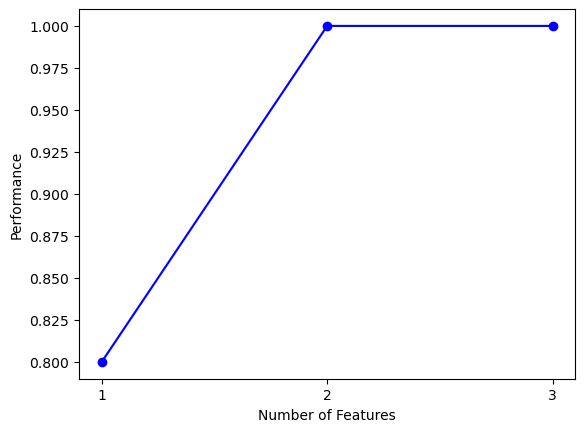

In [13]:
from mlxtend.plotting import plot_sequential_feature_selection as plot_sfs
import matplotlib.pyplot as plt

# Plot the accuracy of the model as a function of the number of features
plot_sfs(sfs.get_metric_dict())
plt.show()

# Recursive Feature Elimination with scikit-learn

In [15]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import StandardScaler

# Load the data
X = np.array(df.iloc[:,:-1])
y = np.array(df.iloc[:,-1])

# Standardize the data
X = StandardScaler().fit_transform(X)

# Logistic regression model
lr = LogisticRegression(max_iter=1000)

# Recursive feature elimination
rfe = RFE(lr, n_features_to_select=3)
rfe.fit(X, y)

RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=3)

In [19]:
# Print the accuracy of the model with features chosen by recursive feature elimination
print(rfe.score(X, y))

print(rfe.ranking_)
print(rfe.support_)

1.0
[7 6 2 4 5 1 1 3 1]
[False False False False False  True  True False  True]
